# Predição de CRA com Regressão
#### Universidade Federal de Campina Grande<br/><br/>Programa de Pós-Graduação em Ciência da Computação<br/><br/>Disciplina: Aprendizagem de Máquina<br/><br/>Aluno: Ruan Victor Bertoldo Reis de Amorim

## 1. Configurações

### 1.1 Bibliotecas:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import datetime

import matplotlib.pyplot as plt

from scipy.stats import skew
from sklearn import linear_model
from scipy.stats.stats import pearsonr
from sklearn.linear_model import Lasso
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV

%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

### 1.2 Dados:
<br/>
<div style="text-align: justify"> Os dados são compostos por notas de 88 alunos do 1º e 2º período do curso de Ciência da Computação, bem como pelos seus respectivos coeficientes de rendimento acadêmico (CRA). Não identificamos nos dados nenhum valor ausente, variável categórica, viés ou qualquer outro tipo de problema que possa prejudicar nossos modelos de predição. </div>



In [45]:
train_data = pd.read_csv("dados/treino.csv")
train_data.head()

,matricula,Vetorial,LPT,P1,IC,LP1,Cálculo2,Discreta,P2,Grafos,Fís.Clássica,LP2,cra,Cálculo1
0,0cc3d63edf0b986cb87e345972857e15,8.6,10.0,9.0,9.1,8.6,8.4,8.3,8.8,8.2,7.9,9.4,8.477647,8.7
1,0d78246db769dc958ce19fc414050b2a,5.6,7.0,7.7,7.0,8.1,6.2,7.3,8.2,5.4,7.7,8.9,6.851724,7.0
2,0f5bb983df06b90337dc2c6301fef3f6,10.0,9.8,7.9,9.6,8.3,8.7,8.8,9.5,9.2,8.6,9.7,9.090588,8.6
3,1307a4421a67a497cea198e8ccfb97ee,6.1,8.3,6.8,8.2,7.1,8.0,6.3,8.9,7.0,8.5,9.0,7.283516,7.8
4,1432d50cf8519694ab992c414d90a130,8.8,9.3,5.0,8.5,5.1,5.0,5.8,7.1,5.4,8.7,8.2,7.205747,5.2


In [46]:
train = train_data[['Vetorial', 'LPT', 'P1', 'IC', 'LP1', 'Cálculo2', 'Discreta', 
                  'P2', 'Grafos', 'Fís.Clássica', 'LP2', 'Cálculo1']]
train.head()

,Vetorial,LPT,P1,IC,LP1,Cálculo2,Discreta,P2,Grafos,Fís.Clássica,LP2,Cálculo1
0,8.6,10.0,9.0,9.1,8.6,8.4,8.3,8.8,8.2,7.9,9.4,8.7
1,5.6,7.0,7.7,7.0,8.1,6.2,7.3,8.2,5.4,7.7,8.9,7.0
2,10.0,9.8,7.9,9.6,8.3,8.7,8.8,9.5,9.2,8.6,9.7,8.6
3,6.1,8.3,6.8,8.2,7.1,8.0,6.3,8.9,7.0,8.5,9.0,7.8
4,8.8,9.3,5.0,8.5,5.1,5.0,5.8,7.1,5.4,8.7,8.2,5.2


In [47]:
#creating matrices for sklearn:
x_train = train[:train.shape[0]]
y_train = train_data.cra

## 2. Função: Root Mean Square Error (RMSE) Com Validação Cruzada

In [48]:
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, x_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

## 3. Regressão com Ridge

### 3.1 Tunando Hiperâmetros 

In [49]:
alphas = [10, 30, 40, 50, 55, 60, 65, 70, 80, 90, 100]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

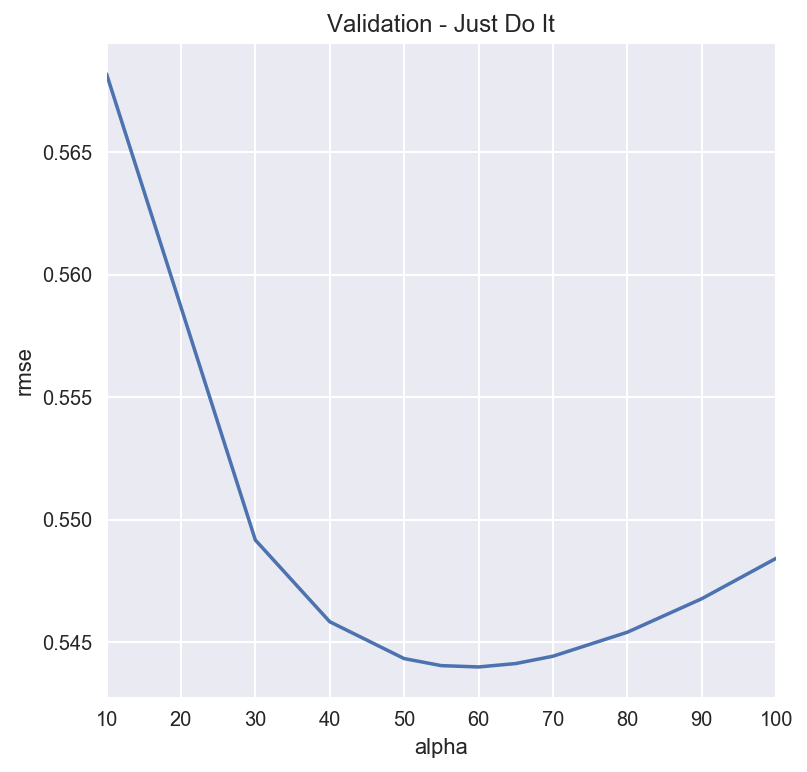

In [50]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

##### Melhor alpha = 60.

### 3.2 RMSE's de Validação Cruzada 

In [51]:
cv_ridge

10     0.568183
30     0.549177
40     0.545845
50     0.544341
55     0.544054
60     0.544000
65     0.544139
70     0.544437
80     0.545416
90     0.546782
100    0.548430
dtype: float64

In [52]:
cv_ridge.min()

0.54400012684070731

### 3.3 Modelo

In [53]:
model_ridge = Ridge(alpha = 60)
model_ridge.fit(x_train, y_train)

print("\n-Modelo Ridge-\n \nIntercept: {0}\n\nCoeficientes:\n\n{1}"
      .format(model_ridge.intercept_, model_ridge.coef_))


-Modelo Ridge-
 
Intercept: 2.2023713700887537

Coeficientes:

[ 0.08523635  0.0121864   0.0246532   0.07324451  0.03323767 -0.01862757
  0.1409126   0.117859    0.13919556  0.04590983  0.00891244  0.02723351]


### 3.4 Resíduos vs Predições

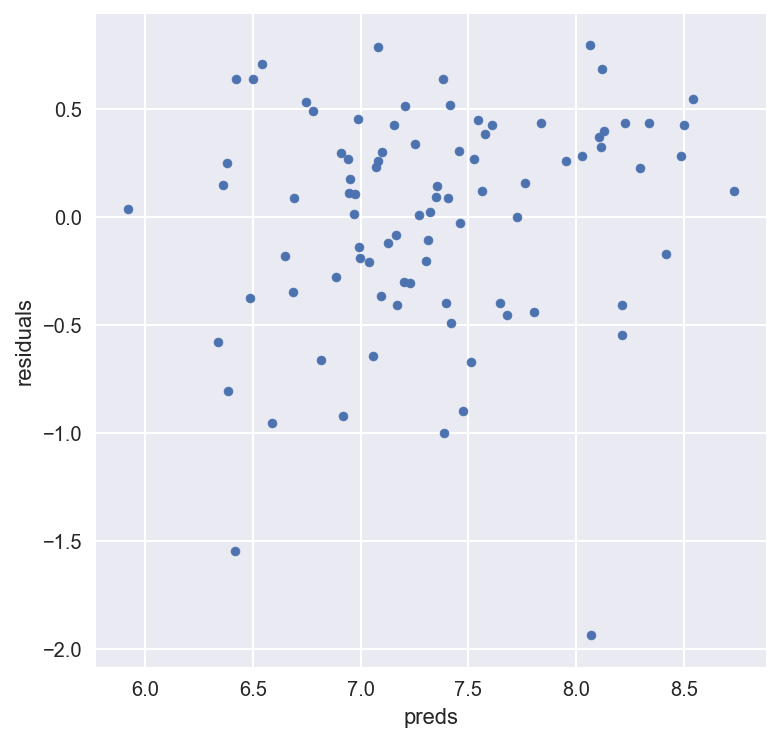

In [54]:
#let's look at the residuals as well:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_ridge.predict(x_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

Dado que o plot dos resíduos não parece seguir nenhuma tendência, podemos considerar que existem bons indícios da adequabilidade de modelos lineares a esse problema.  

## 4. Regressão com Lasso

### 4.1 Tunando Hiperâmetros 

In [55]:
alphas = [0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13]
cv_lasso = [rmse_cv(Lasso(alpha = alpha)).mean() 
            for alpha in alphas]

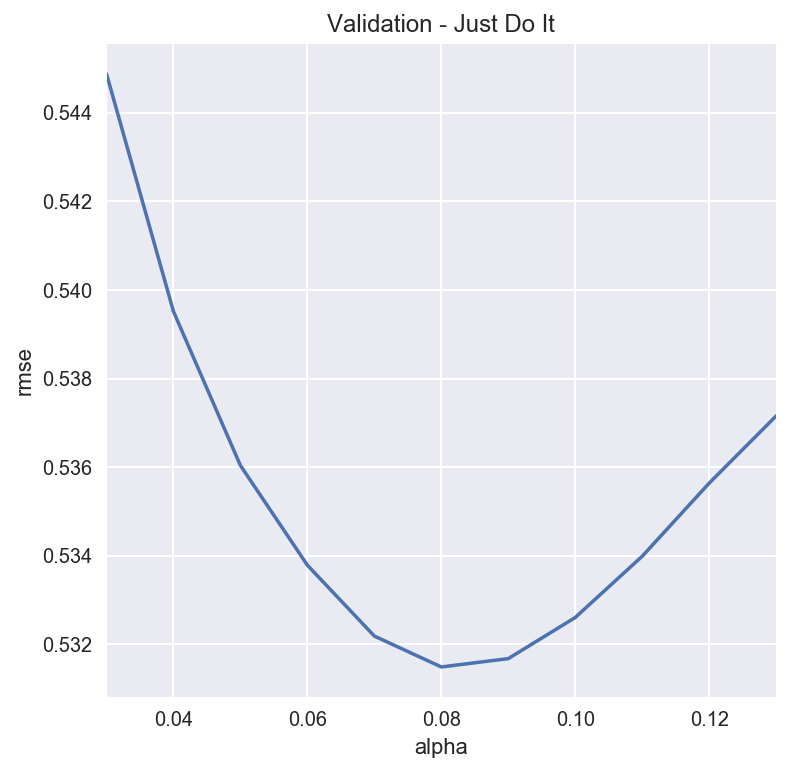

In [56]:
cv_lasso = pd.Series(cv_lasso, index = alphas)
cv_lasso.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

##### Melhor alpha = 0.08

### 4.2 RMSE's de Validação Cruzada 

In [57]:
cv_lasso

0.03    0.544876
0.04    0.539512
0.05    0.536036
0.06    0.533785
0.07    0.532186
0.08    0.531489
0.09    0.531677
0.10    0.532605
0.11    0.533988
0.12    0.535638
0.13    0.537154
dtype: float64

In [58]:
cv_lasso.min()

0.53148901863240494

### 4.3 Modelo

In [59]:
model_lasso = Lasso(alpha = 0.08)
model_lasso.fit(x_train, y_train)

print("\n-Modelo Lasso-\n \nIntercept: {0}\n\nCoeficientes:\n\n{1}"
      .format(model_lasso.intercept_, model_lasso.coef_))



-Modelo Lasso-
 
Intercept: 2.793839430295132

Coeficientes:

[ 0.07258145  0.          0.          0.03765368  0.         -0.
  0.17573898  0.14906838  0.18479298  0.          0.          0.        ]


### 4.4 Resíduos vs Predições

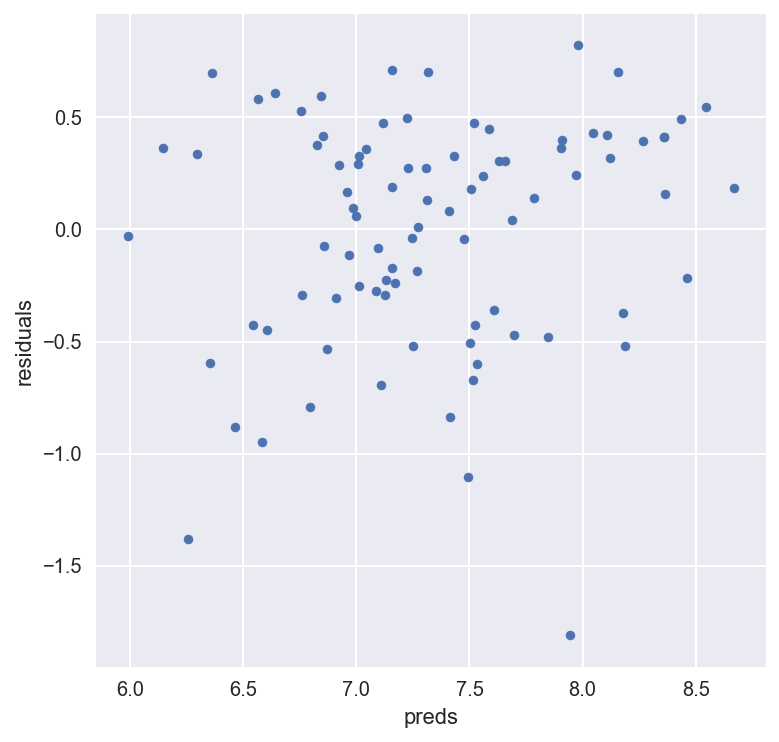

In [60]:
#let's look at the residuals as well:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_lasso.predict(x_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

Dado que o plot dos resíduos não parece seguir nenhuma tendência, podemos considerar que existem bons indícios da adequabilidade de modelos lineares a esse problema.  

## 5. Regressão Sem Regularização

### 5.1 Modelo

In [61]:
model_linear = linear_model.LinearRegression()
model_linear.fit(x_train, y_train)

print("\n-Modelo Sem Regularização-\n \nIntercept: {0}\n\nCoeficientes:\n\n{1}"
      .format(model_linear.intercept_, model_linear.coef_))



-Modelo Sem Regularização-
 
Intercept: 1.790108398743353

Coeficientes:

[ 0.07163813  0.00538511 -0.00373541  0.09889335  0.00695369 -0.04768915
  0.18162602  0.21960659  0.18334251  0.06046008 -0.04323803  0.01316339]


### 5.2 RMSE

In [62]:
cv_model_linear = rmse_cv(model_linear)
cv_model_linear

array([ 0.72051121,  0.5131015 ,  0.59338652,  0.56046287,  0.59570912])

In [63]:
cv_model_linear.mean()

0.59663424427016787

### 5.3 Resíduos vs Predições

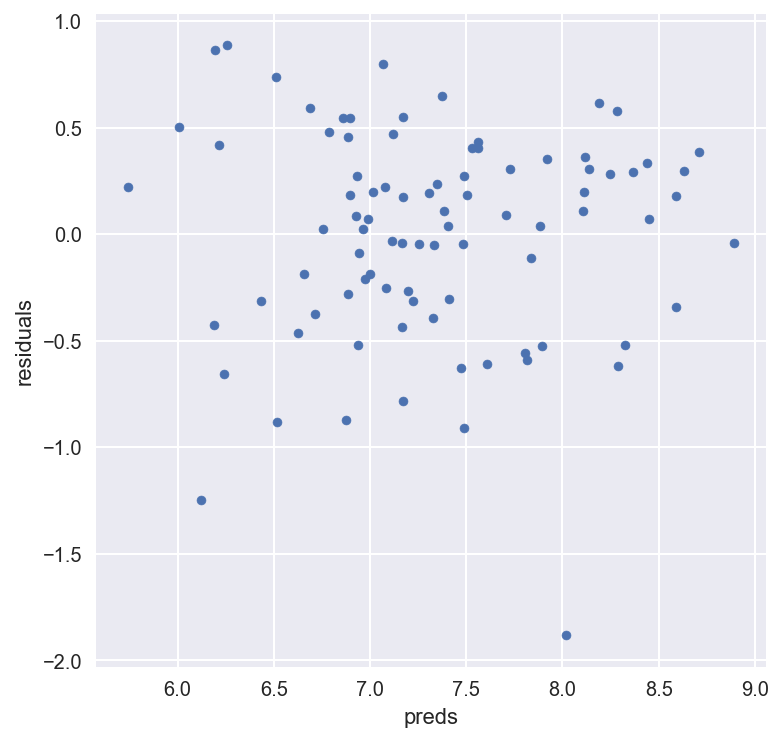

In [64]:
#let's look at the residuals as well:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_linear.predict(x_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

Dado que o plot dos resíduos não parece seguir nenhuma tendência, podemos considerar que existem bons indícios da adequabilidade de modelos lineares a esse problema.  

## 6. Regressão com K-NN

### 6.1 Tunando Hiperâmetros 

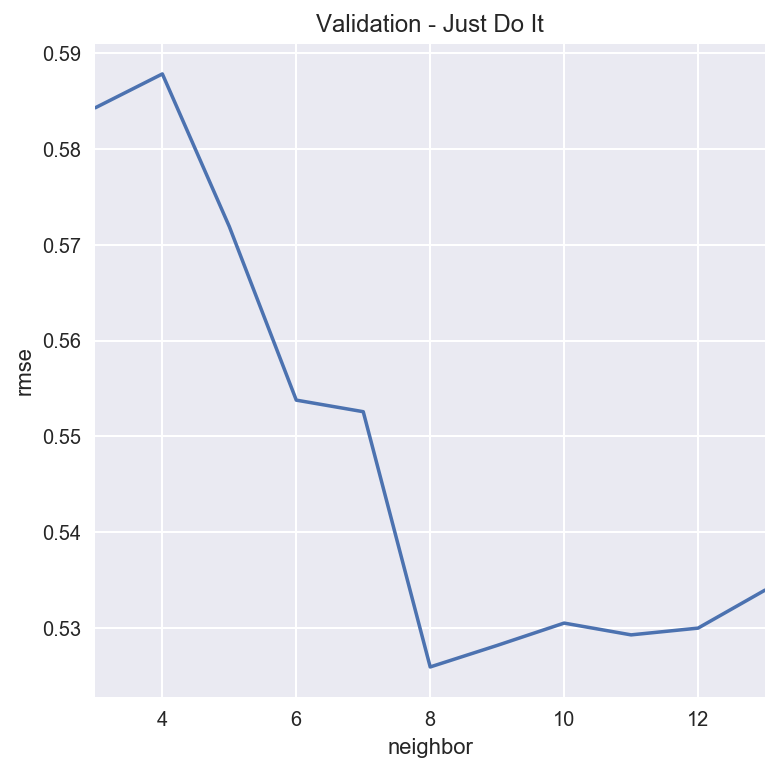

In [65]:
neighbors = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
cv_knn = [rmse_cv(KNeighborsRegressor(n_neighbors = neighbor)).mean() 
            for neighbor in neighbors]

cv_knn = pd.Series(cv_knn, index = neighbors)
cv_knn.plot(title = "Validation - Just Do It")
plt.xlabel("neighbor")
plt.ylabel("rmse")

##### Melhor nº de vizinhos = 8

### 6.2 RMSE's de Validação Cruzada

In [66]:
cv_knn

3     0.584325
4     0.587855
5     0.571910
6     0.553789
7     0.552580
8     0.525923
9     0.528171
10    0.530503
11    0.529273
12    0.529978
13    0.533946
dtype: float64

In [67]:
cv_knn.min()

0.52592269103356193

### 6.3 Modelo

In [68]:
model_knn = KNeighborsRegressor(n_neighbors=8)
model_knn.fit(x_train, y_train)
print("\n- Modelo K-NN -\n\n{0}".format(model_knn))


- Modelo K-NN -

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=8, p=2,
          weights='uniform')


### 6.4 Resíduos vs Predições

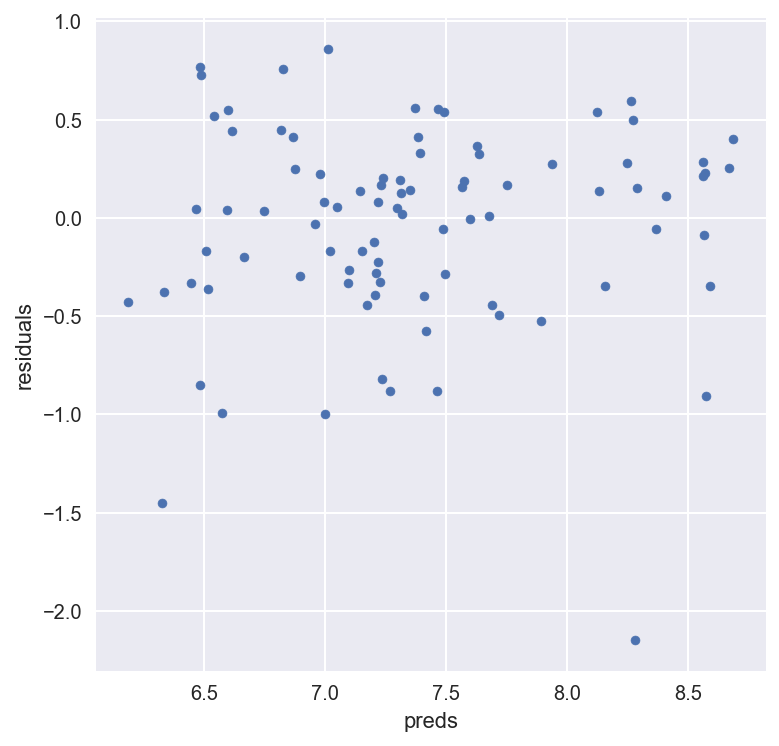

In [69]:
#let's look at the residuals as well:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_knn.predict(x_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

Dado que o plot dos resíduos não parece seguir nenhuma tendência, podemos considerar que existem bons indícios da adequabilidade de modelos lineares a esse problema.  

## 7. Regressão com Kernel Regression

### 7.1 Tunando Hiperâmetros 

In [70]:
alphas = [70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120]
cv_kernel = [rmse_cv(KernelRidge(alpha = alpha)).mean() 
            for alpha in alphas]

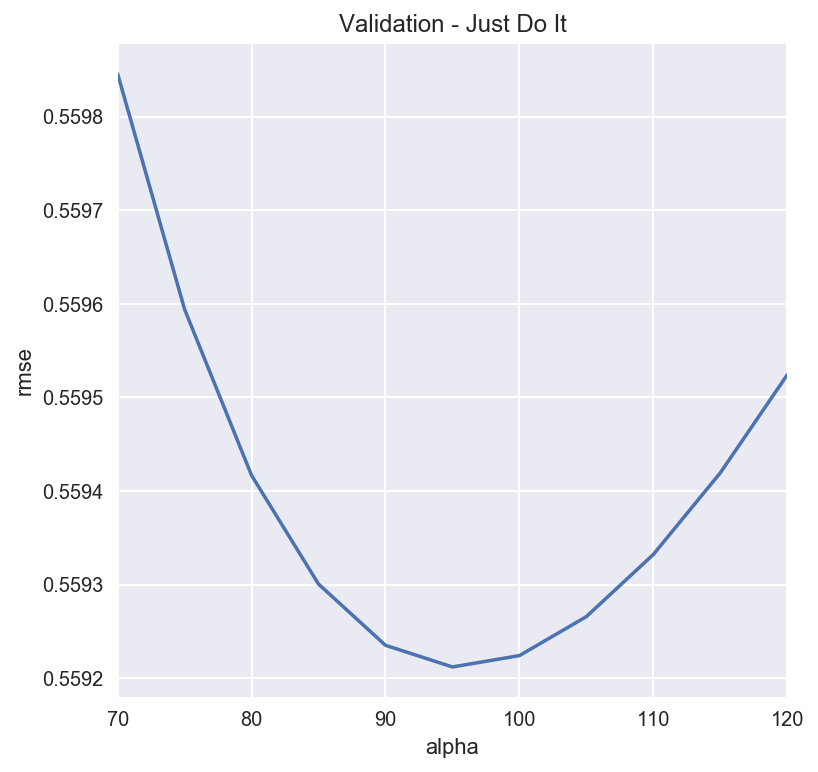

In [71]:
cv_kernel = pd.Series(cv_kernel, index = alphas)
cv_kernel.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

##### Melhor alpha = 95

### 7.2  RMSE's de Validação Cruzada

In [72]:
cv_kernel

70     0.559846
75     0.559594
80     0.559417
85     0.559301
90     0.559235
95     0.559212
100    0.559224
105    0.559266
110    0.559332
115    0.559419
120    0.559524
dtype: float64

In [73]:
cv_kernel.min()

0.55921200076576494

### 7.3 Modelo

In [74]:
model_kernel = KernelRidge(alpha=95)
model_kernel.fit(x_train, y_train)
print("\n- Modelo Kernel Regression -\n\n{0}".format(model_kernel))


- Modelo Kernel Regression -

KernelRidge(alpha=95, coef0=1, degree=3, gamma=None, kernel='linear',
      kernel_params=None)


### 7.4 Resíduos vs Predições

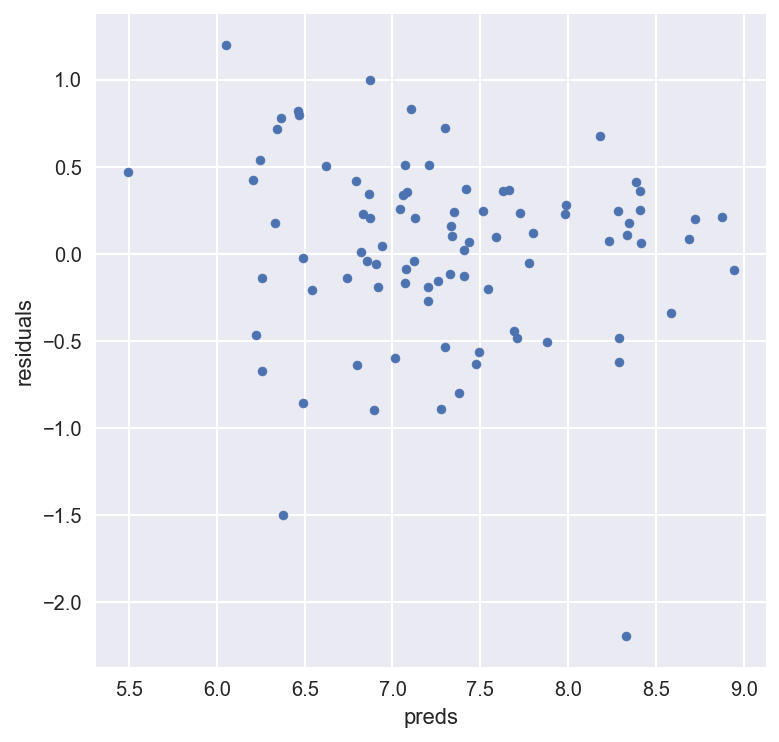

In [75]:
#let's look at the residuals as well:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

preds = pd.DataFrame({"preds":model_kernel.predict(x_train), "true":y_train})
preds["residuals"] = preds["true"] - preds["preds"]
preds.plot(x = "preds", y = "residuals",kind = "scatter")

Dado que o plot dos resíduos não parece seguir nenhuma tendência, podemos considerar que existem bons indícios da adequabilidade de modelos lineares a esse problema.  

## 8. Dados de Teste

In [76]:
all_data_test = pd.read_csv("dados/graduados_teste.csv")
all_data_test.head()

,ALU_NOVAMATRICULA,ALU_ANO_EVASA,ALU_PERIODO_EVASAO,MAT_TUR_DIS_DISCIPLINA,DISCIPLINA,CREDITOS,MAT_MEDIA_FINAL
0,3b3c1d5f7a47df614511c13e0c2a7f5a,2014,1,1109035,Álgebra Vetorial e Geometria Analítica,4,5.0
1,3b3c1d5f7a47df614511c13e0c2a7f5a,2014,1,1109103,Cálculo Diferencial e Integral I,4,3.8
2,3b3c1d5f7a47df614511c13e0c2a7f5a,2014,1,1411167,Programação I,4,5.3
3,3b3c1d5f7a47df614511c13e0c2a7f5a,2014,1,1411174,Introdução à Computação,4,5.4
4,3b3c1d5f7a47df614511c13e0c2a7f5a,2014,1,1307151,Leitura e Produção de Textos,4,7.8


In [77]:
def compute_cra(student_grades):
    grades, credits = 0, 0   
    for index, row in student_grades.iterrows():
        new_grade = row['MAT_MEDIA_FINAL']
        new_credit = row['CREDITOS']
        
        if(not np.isnan(new_grade)):
            grades += new_grade * new_credit
            credits += new_credit
    
    return grades/credits

In [78]:
def get_grades_by_code(data_by_enrollment, discipline_code):
    discipline_registers = data_by_enrollment[data_by_enrollment['MAT_TUR_DIS_DISCIPLINA'] == discipline_code]
    discipline_array_index = discipline_registers.index.tolist()
    
    if(not discipline_array_index):
        return 0
    
    i, grades = 0, 0
    
    for index in discipline_array_index:
        new_grade = data_by_enrollment.loc[index]['MAT_MEDIA_FINAL']        
        if(not np.isnan(new_grade)):
            grades += new_grade
            i += 1
    
    if(grades > 0):
        return grades/i
    
    return 0 

In [79]:
enrollments = all_data_test.ALU_NOVAMATRICULA.unique()

### Discipline for prediction ###
# Vetorial ==> 1109035
# LPT ==> 1307151
# P1 ==> 1411167
# IC ==> 1411174
# LP1 ==> 1411180
# Cálculo2 ==> 1109053
# Discreta ==> 1109113
# P2 ==> 1411168
# Grafos ==> 1411170
# Fís.Clássica ==> 1108089
# LP2 ==> 1411181
# Cálculo1 ==> 1109103

index = 0
fields = ['Vetorial', 'LPT', 'P1', 'IC', 'LP1', 'Cálculo2', 'Discreta', 
          'P2', 'Grafos', 'Fís.Clássica', 'LP2', 'Cálculo1', 'cra']
final_data_test = pd.DataFrame(columns=fields)

for enrollment in enrollments:
    data_by_enrollment = all_data_test.loc[all_data_test['ALU_NOVAMATRICULA'] == enrollment]
    
    ## Grades of disciplines ##
    grade_vetorial = get_grades_by_code(data_by_enrollment, 1109035)
    grade_lpt = get_grades_by_code(data_by_enrollment, 1307151)
    grade_p1 = get_grades_by_code(data_by_enrollment, 1411167)
    grade_ic = get_grades_by_code(data_by_enrollment, 1411174)
    grade_lp1 = get_grades_by_code(data_by_enrollment, 1411180)
    grade_calc2 = get_grades_by_code(data_by_enrollment, 1109053)
    grade_discreta = get_grades_by_code(data_by_enrollment, 1109113)
    grade_p2 = get_grades_by_code(data_by_enrollment, 1411168)
    grade_grafos = get_grades_by_code(data_by_enrollment, 1411170)
    grade_fis_classica = get_grades_by_code(data_by_enrollment, 1108089)
    grade_lp2 = get_grades_by_code(data_by_enrollment, 1411181)
    grade_calc1 = get_grades_by_code(data_by_enrollment, 1109103)
    
    ## CRA ##
    cra = compute_cra(data_by_enrollment)
    
    ## Adding row to new data frame ##
    new_data = pd.DataFrame({"Vetorial" : grade_vetorial,
                             "LPT" : grade_lpt,
                             "P1" : grade_p1,
                             "IC" : grade_ic,
                             "LP1" : grade_lp1,
                             "Cálculo2" : grade_calc2,
                             "Discreta" : grade_discreta,
                             "P2" : grade_p2,
                             "Grafos" : grade_grafos,
                             "Fís.Clássica" : grade_fis_classica,
                             "LP2" : grade_lp2,
                             "Cálculo1" : grade_calc1,
                             "cra" : cra}, index=[index])
    
    final_data_test = pd.concat([final_data_test, new_data])
    index += 1

In [80]:
x_test = final_data_test[['Vetorial', 'LPT', 'P1', 'IC', 'LP1', 'Cálculo2', 'Discreta', 
                  'P2', 'Grafos', 'Fís.Clássica', 'LP2', 'Cálculo1']]
y_test = final_data_test.cra

## 9. Avaliação dos Modelos
<br/>
<div style="text-align: justify">De acordo com os valores de RMSE encontrados durante a validação cruzada dos modelos, podemos considerar que o melhor modelo de regressão encontrado é o modelo não paramétrico K-Nearest Neighbors (KNN). Tal modelo se adequou melhor no treino, em relação aos outros, considerando o problema abordado neste exercício.</div>

In [87]:
def rmse(model): 
    rmse_ = np.sqrt(mean_squared_error(y_test, model.predict(x_test)))
    return (rmse_)

### 9.1 K-Nearest Neighbors: RMSE (Dados de Teste)

In [88]:
rmse(model_knn)

0.45342050590112237

### 9.2 Outros Modelos: RMSE (Dados de Teste)

In [89]:
print("Modelo Ridge")
rmse(model_ridge)

Modelo Ridge


0.35461477163684907

In [90]:
print("Modelo Lasso")
rmse(model_lasso)

Modelo Lasso


0.34627569512385764

In [85]:
print("Modelo Sem Regularização")
rmse(model_linear)

Modelo Sem Regularização


0.36564280265819982

In [86]:
print("Kernel Regression")
rmse(model_kernel)

Kernel Regression


0.44412301304368257